<a href="https://colab.research.google.com/github/Aelamin19/Business-Analytics/blob/main/Marketing_Analytics_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
candy_crush_df = pd.read_csv('/content/candy_crush.csv')
candy_crush_df

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False


#Becoming Familiar with the data

In [3]:
candy_crush_df.describe()

,user_id,gate,gamerounds_sum
count,9.018900e+04,90189.000000,90189.000000
mean,4.998412e+06,40.087483,51.872457
std,2.883286e+06,9.999673,195.050858
min,1.160000e+02,30.000000,0.000000
25%,2.512230e+06,30.000000,5.000000
50%,4.995815e+06,50.000000,16.000000
75%,7.496452e+06,50.000000,51.000000
max,9.999861e+06,50.000000,49854.000000


In [4]:
candy_crush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         90189 non-null  int64
 1   gate            90189 non-null  int64
 2   gamerounds_sum  90189 non-null  int64
 3   retention_day   90189 non-null  bool 
 4   retention_week  90189 non-null  bool 
dtypes: bool(2), int64(3)
memory usage: 2.2 MB


In [5]:
#checking for null values
candy_crush_df.isna().sum()

user_id           0
gate              0
gamerounds_sum    0
retention_day     0
retention_week    0
dtype: int64

In [6]:
total_players = candy_crush_df['user_id'].nunique()
total_players

90189

In [7]:
day_retainers = candy_crush_df[candy_crush_df['retention_day'] == True]\
                    ['user_id'].nunique()

week_retainers = candy_crush_df[candy_crush_df['retention_week'] == True]\
                    ['user_id'].nunique()

print(day_retainers)
print(week_retainers)

40153
16781


In [8]:
#What rate of players return to play after 1 day
rate_day = day_retainers/total_players
print(rate_day)

#What rate of players return to play after 1 week
rate_week = week_retainers/total_players
print(rate_week)

0.4452095044850259
0.1860648194347426


In [9]:
gate_30 = candy_crush_df[candy_crush_df['gate'] == 30]
gate_50 = candy_crush_df[candy_crush_df['gate'] == 50]

In [10]:
day_retainers_gate_30 = gate_30[gate_30['retention_day'] == True]\
                    ['user_id'].nunique()
print(day_retainers_gate_30)

week_retainers_gate_30 = gate_30[gate_30['retention_day'] == True]\
                    ['user_id'].nunique()
print(week_retainers_gate_30)

day_retainers_gate_50 = gate_50[gate_50['retention_day'] == True]\
                    ['user_id'].nunique()
print(day_retainers_gate_50)

week_retainers_gate_50 = gate_50[gate_50['retention_day'] == True]\
                    ['user_id'].nunique()

print(week_retainers_gate_50)

20034
20034
20119
20119


#Segmenting the dataset

In [13]:
#Day retention

total_day = candy_crush_df[candy_crush_df['retention_day'] == True]\
                    ['user_id'].nunique()
#print(total_day)

retainers_day = candy_crush_df[candy_crush_df['retention_day'] == True]\
                .groupby(['gate'])\
                ['user_id'].nunique()
print(retainers_day)

ret_rate_day = retainers_day/total_day
print(ret_rate_day)

40153
gate
30    20034
50    20119
Name: user_id, dtype: int64
gate
30    0.498942
50    0.501058
Name: user_id, dtype: float64


In [12]:
#Week retention

total_week = candy_crush_df[candy_crush_df['retention_week'] == True]\
                    ['user_id'].nunique()
print(total_week)

retainers_week = candy_crush_df[candy_crush_df['retention_week'] == True]\
                .groupby(['gate'])\
                ['user_id'].nunique()
print(retainers_week)

ret_rate_week = retainers_week/total_week
print(ret_rate_week)

16781
gate
30    8502
50    8279
Name: user_id, dtype: int64
gate
30    0.506644
50    0.493356
Name: user_id, dtype: float64


In [40]:
gamerounds_sort_df = candy_crush_df.sort_values(by=['gamerounds_sum'])
gamerounds_sort_df

,user_id,gate,gamerounds_sum,retention_day,retention_week
45094,4995815,50,0,False,False
56753,6289435,30,0,False,False
56786,6293240,50,0,False,False
56834,6299092,30,0,False,False
56876,6304159,50,0,False,False
...,...,...,...,...,...
48188,5346171,50,2294,True,True
43671,4832608,30,2438,True,True
29417,3271615,50,2640,True,False
7912,871500,30,2961,True,True


In [41]:
gamerounds_seg_day = gamerounds_sort_df.groupby(['gamerounds_sum','retention_day'])['user_id'].nunique()

print(gamerounds_seg_day)

gamerounds_seg_week = gamerounds_sort_df.groupby(['gamerounds_sum','retention_week'])['user_id'].nunique()

print(gamerounds_seg_week)

gamerounds_sum  retention_day
0               False            3907
                True               87
1               False            5367
                True              171
2               False            4332
                                 ... 
2294            True                1
2438            True                1
2640            True                1
2961            True                1
49854           False               1
Name: user_id, Length: 1320, dtype: int64
gamerounds_sum  retention_week
0               False             3965
                True                29
1               False             5497
                True                41
2               False             4539
                                  ... 
2294            True                 1
2438            True                 1
2640            False                1
2961            True                 1
49854           True                 1
Name: user_id, Length: 1383, dtype: int64


#Exploratory Data Analysis

lets start with a correlation matrix so that we can have a good idea of which columns of the dataset have relatively stronger correlations between each other.

this will guide our exploratory analysis

<Axes: >

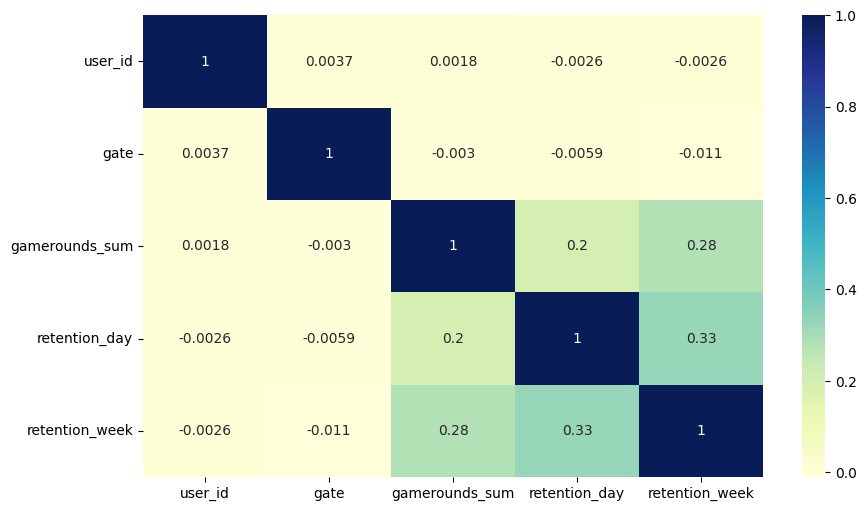

In [21]:
plt.figure(figsize= (10,6))
sns.heatmap(candy_crush_df.corr(), annot=True, cmap= "YlGnBu")

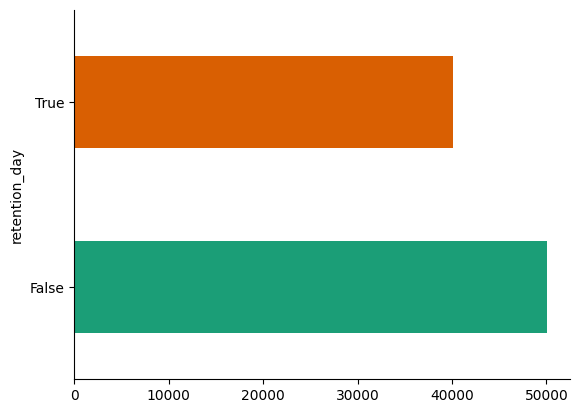

In [13]:
#retention_day

from matplotlib import pyplot as plt
import seaborn as sns
candy_crush_df.groupby('retention_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

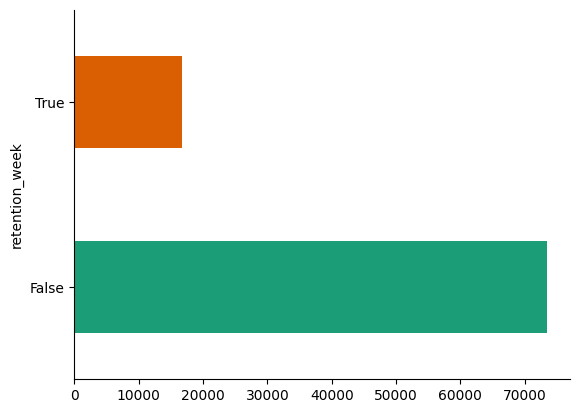

In [14]:
#retention_week

from matplotlib import pyplot as plt
import seaborn as sns
candy_crush_df.groupby('retention_week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
import matplotlib.pyplot as plt

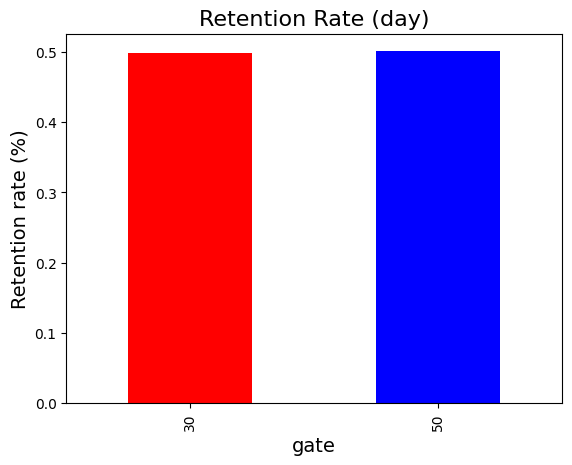

In [16]:
colours = ['red', 'blue']
ret_rate_day.plot(kind = 'bar', color = colours)

plt.title('Retention Rate (day)', size = 16)
plt.xlabel('gate', size = 14)
plt.ylabel('Retention rate (%)', size = 14)

plt.show()

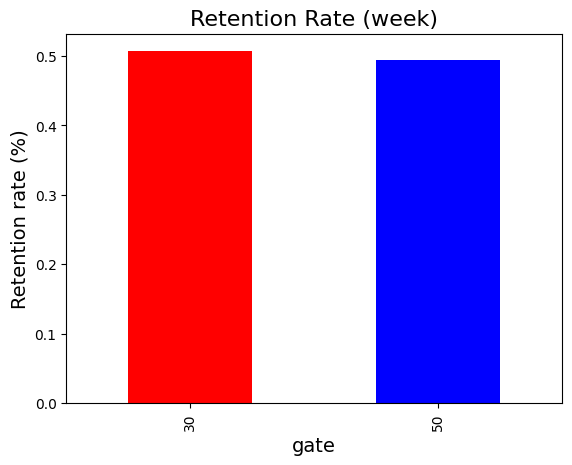

In [17]:
colours = ['red', 'blue']
ret_rate_week.plot(kind = 'bar', color = colours)

plt.title('Retention Rate (week)', size = 16)
plt.xlabel('gate', size = 14)
plt.ylabel('Retention rate (%)', size = 14)

plt.show()

In [ ]:
# Convert the result to a DataFrame for easier manipulation
gamerounds_seg_day_df = gamerounds_seg_day.reset_index()

In [44]:
gamerounds_seg_day_df

,gamerounds_sum,retention_day,user_id
0,0,False,3907
1,0,True,87
2,1,False,5367
3,1,True,171
4,2,False,4332
...,...,...,...
1315,2294,True,1
1316,2438,True,1
1317,2640,True,1
1318,2961,True,1


In [49]:
# Filter out rows where gamerounds_sum is not 0
non_zero_data_day = gamerounds_seg_day_df[gamerounds_seg_day_df['gamerounds_sum'] != 0]

In [51]:
non_zero_data_day

,gamerounds_sum,retention_day,user_id
2,1,False,5367
3,1,True,171
4,2,False,4332
5,2,True,274
6,3,False,3630
...,...,...,...
1315,2294,True,1
1316,2438,True,1
1317,2640,True,1
1318,2961,True,1


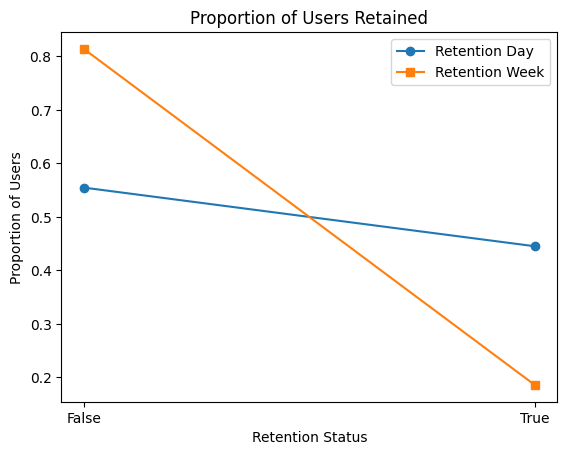

In [54]:
# Line plot  showing the trend of retention day and retention week
retention_day_counts = candy_crush_df['retention_day'].value_counts(normalize=True).sort_index()
retention_week_counts = candy_crush_df['retention_week'].value_counts(normalize=True).sort_index()
plt.plot(retention_day_counts.index, retention_day_counts.values, marker='o', label='Retention Day')
plt.plot(retention_week_counts.index, retention_week_counts.values, marker='s', label='Retention Week')
plt.title('Proportion of Users Retained')
plt.xlabel('Retention Status')
plt.ylabel('Proportion of Users')
plt.xticks([False, True], ['False', 'True'])
plt.legend()
plt.show()

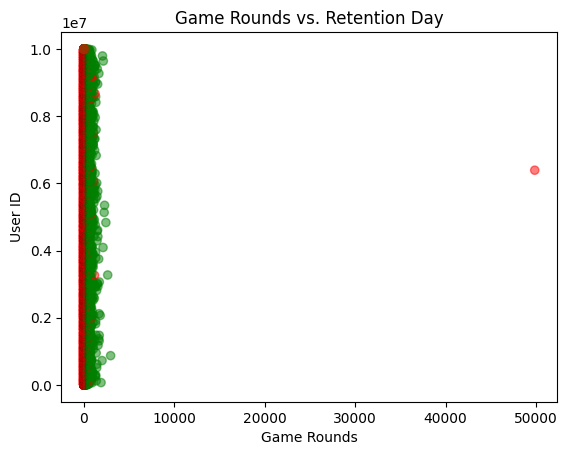

In [55]:
# Scatter plot of game rounds vs. retention day
colors = candy_crush_df['retention_day'].map({False: 'red', True: 'green'})
plt.scatter(candy_crush_df['gamerounds_sum'], candy_crush_df['user_id'], c=colors, alpha=0.5)
plt.title('Game Rounds vs. Retention Day')
plt.xlabel('Game Rounds')
plt.ylabel('User ID')
plt.show()

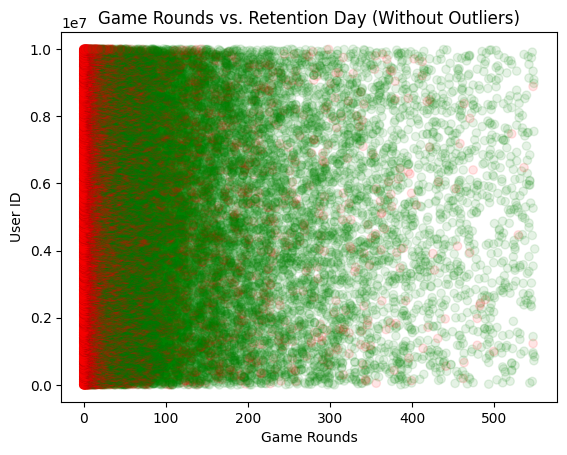

In [60]:
#There is a big noticeable outlier so we wil filter the data
import numpy as np

# Define the IQR range
Q1 = candy_crush_df['gamerounds_sum'].quantile(0.15)
Q3 = candy_crush_df['gamerounds_sum'].quantile(0.95)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = candy_crush_df[(candy_crush_df['gamerounds_sum'] >= lower_bound) & (candy_crush_df['gamerounds_sum'] <= upper_bound)]

# Scatter plot of game rounds vs. retention day without outliers
colors = filtered_df['retention_day'].map({False: 'red', True: 'green'})
plt.scatter(filtered_df['gamerounds_sum'], filtered_df['user_id'], c=colors, alpha=0.1)
plt.title('Game Rounds vs. Retention Day (Without Outliers)')
plt.xlabel('Game Rounds')
plt.ylabel('User ID')
plt.show()

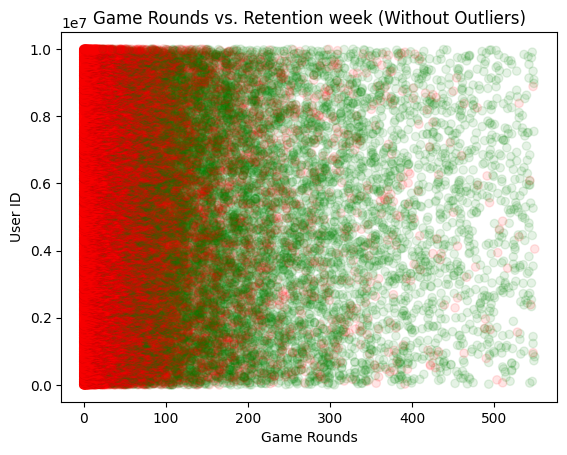

In [61]:
# Scatter plot of game rounds vs. retention day without outliers
colors = filtered_df['retention_week'].map({False: 'red', True: 'green'})
plt.scatter(filtered_df['gamerounds_sum'], filtered_df['user_id'], c=colors, alpha=0.1)
plt.title('Game Rounds vs. Retention week (Without Outliers)')
plt.xlabel('Game Rounds')
plt.ylabel('User ID')
plt.show()

#Lift & Significant Test Functions

In [70]:
# Creat a life function to calculate life for group a and b
import numpy as np

def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)

    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean

    return str(round(lift*100, 2)) + '%'

In [71]:
# Perform a t significance test for group a and b
from scipy.stats import ttest_ind

def t_statistic(a, b):
  a = a.astype(float)
  b = b.astype(float)

  t = ttest_ind(a, b)

  return t

#A/B Testing

##Day retention

In [90]:
candy_crush_df['gate'].dtypes

dtype('int64')

In [132]:
ret_day = candy_crush_df[candy_crush_df['retention_day'] == True]

day_retained = ret_day.groupby(['user_id', 'gate']).max()

day_retained = day_retained.drop(['retention_day', 'retention_week'], axis = 1)

day_retained = pd.DataFrame(day_retained.unstack(level=1))
day_retained.columns = day_retained.columns.droplevel(0)

gate_30 = day_retained[30].dropna()

gate_50 = day_retained[50].dropna()

day retention rate results

Lift and t value results for day retention

In [131]:
print(f'the calculated lift is: {lift(gate_30, gate_50)}')

print(f'the calculated t value is:{t_statistic(gate_30, gate_50)}')

the calculated lift is: 1.03%
the calculated t value is:TtestResult(statistic=-0.7117397153010641, pvalue=0.47663010465013655, df=40151.0)


##Week retention

In [148]:
ret_week = candy_crush_df[candy_crush_df['retention_week'] == True]

week_retained = ret_week.groupby(['user_id', 'gate']).max()

week_retained = week_retained.drop(['retention_day', 'retention_week'], axis = 1)

week_retained = pd.DataFrame(week_retained.unstack(level=1))
week_retained.columns = week_retained.columns.droplevel(0)

gate_30 = week_retained[30].dropna()

gate_50 = week_retained[50].dropna()

In [149]:
print(f'the calculated lift is: {lift(gate_30, gate_50)}')

print(f'the calculated t value is:{t_statistic(gate_30, gate_50)}')

the calculated lift is: -0.19%
the calculated t value is:TtestResult(statistic=0.04770958692373003, pvalue=0.9619482613634911, df=16779.0)


In [18]:
candy_crush_df

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True
...,...,...,...,...,...
90184,9999441,50,97,True,False
90185,9999479,50,30,False,False
90186,9999710,30,28,True,False
90187,9999768,50,51,True,False
